In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud


c:\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
books_df = pd.read_csv("bestsellers.csv")

In [3]:
books_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Printing details about columns of the dataset

In [4]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Printing number of rows and columns in our dataset

In [5]:
rows = len(books_df)
cols = len(books_df.columns)
print("No of rows : ",rows,"\nNo of columns : ",cols)

No of rows :  550 
No of columns :  7


Finding NaN values in the file

In [6]:
books_df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Finding duplicate records in the file

In [7]:
books_df.duplicated().sum()

0

Printing number of authors and books

In [8]:
No_of_authors = len(set(books_df['Name']))
No_of_books = len(set(books_df['Author']))
print("Number of books: ",No_of_books,"\nNumber of authors: ",No_of_authors)

Number of books:  248 
Number of authors:  351


Number of unique records in the dataframe

In [9]:
books_df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

Statistical Representation of the dataframe

In [10]:
books_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Description of object type columns of dataframe

In [11]:
for i in books_df.columns:
    if books_df[i].dtype==object:
        print(books_df[i].describe())

count                                                   550
unique                                                  351
top       Publication Manual of the American Psychologic...
freq                                                     10
Name: Name, dtype: object
count             550
unique            248
top       Jeff Kinney
freq               12
Name: Author, dtype: object
count             550
unique              2
top       Non Fiction
freq              310
Name: Genre, dtype: object


The above output shows that our dataset has repeated authors and books

Print book and author name which has been best-seller for most of the years

In [12]:
ind=books_df['Name'].value_counts().idxmax()
books_df[books_df['Name']==ind][['Name','Author','Year']]

,Name,Author,Year
271,Publication Manual of the American Psychologic...,American Psychological Association,2009
272,Publication Manual of the American Psychologic...,American Psychological Association,2010
273,Publication Manual of the American Psychologic...,American Psychological Association,2011
274,Publication Manual of the American Psychologic...,American Psychological Association,2012
275,Publication Manual of the American Psychologic...,American Psychological Association,2013
276,Publication Manual of the American Psychologic...,American Psychological Association,2014
277,Publication Manual of the American Psychologic...,American Psychological Association,2015
278,Publication Manual of the American Psychologic...,American Psychological Association,2016
279,Publication Manual of the American Psychologic...,American Psychological Association,2017
280,Publication Manual of the American Psychologic...,American Psychological Association,2018


In [13]:
books_df['Year'].value_counts()

2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: Year, dtype: int64

Number of books of each genre

In [14]:
books_df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Books that have earned the most money in each genre

In [15]:
books_df[books_df['Price']==books_df.groupby(['Genre']).get_group('Fiction')['Price'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction


In [16]:
books_df[books_df['Price']==books_df.groupby(['Genre']).get_group('Non Fiction')['Price'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


In [17]:
fiction_df=books_df[books_df['Genre']=='Fiction']
fiction_df[fiction_df['Price']==fiction_df['Price'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction


In [18]:
non_fiction_df=books_df[books_df['Genre']=='Non Fiction']
non_fiction_df[non_fiction_df['Price']==non_fiction_df['Price'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


Average rating of each genre

In [19]:
books_df.groupby(['Genre'])['User Rating'].mean()

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

Most popular author name in each genre

In [20]:
genre=np.unique(books_df.Genre.values)
genre

array(['Fiction', 'Non Fiction'], dtype=object)

In [21]:
[[i,books_df.groupby(['Genre'])['Author'].value_counts()[i].idxmax()] for i in genre]

[['Fiction', 'Jeff Kinney'], ['Non Fiction', 'Gary Chapman']]

No of books sold in each year

In [22]:
books_df.groupby('Year').size()

Year
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
dtype: int64

Box Plot for ratings and Price

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

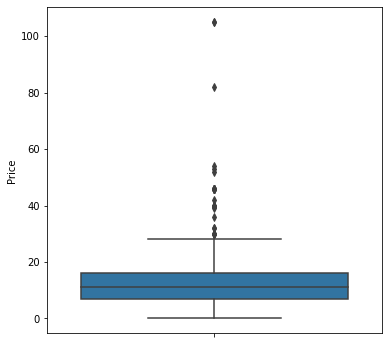

In [24]:
fig = plt.figure(figsize=[6,6])
sns.boxplot(data=books_df,y=books_df['Price'])
plt.show()

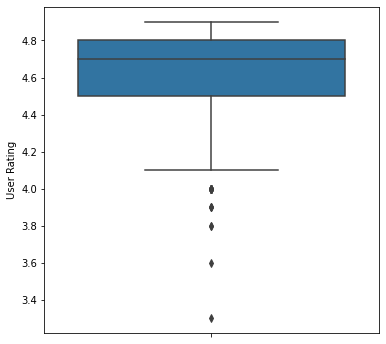

In [25]:
fig = plt.figure(figsize=[6,6])
sns.boxplot(data=books_df,y=books_df['User Rating'])
plt.show()

In [26]:
Q1=books_df['User Rating'].quantile(0.25)
Q2=books_df['User Rating'].quantile(0.50)
Q3=books_df['User Rating'].quantile(0.75)

In [27]:
IQR=Q3-Q1
lowval=Q1-1.5*IQR
maxval=Q3+1.5*IQR
print(lowval,maxval)

4.050000000000001 5.25


In [28]:
books_df[(books_df['User Rating']>maxval)|(books_df['User Rating']<lowval)]['User Rating'].value_counts()

4.0    14
3.9     3
3.8     2
3.6     1
3.3     1
Name: User Rating, dtype: int64

In [29]:
import plotly.express as px

In [30]:
from turtle import width

px.box(data_frame=books_df,x=books_df['Genre'],y=books_df['Price'],width=700,height=500)

Trend of fiction and non-fiction over the years

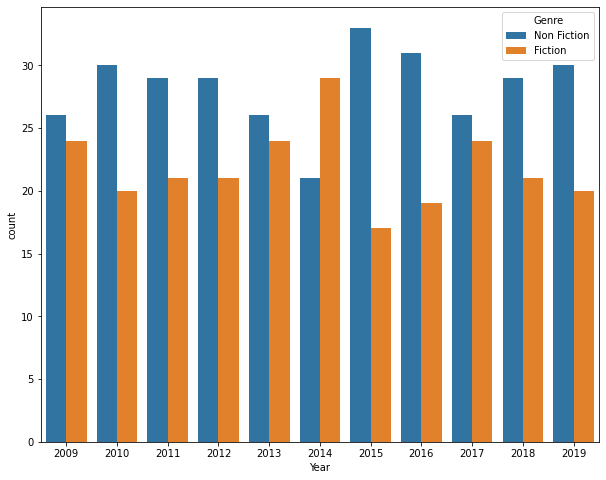

In [41]:
plt.figure(figsize=[10,8])
sns.countplot(data=books_df, x=books_df['Year'], hue=books_df['Genre'])
plt.show()

2014 analysis

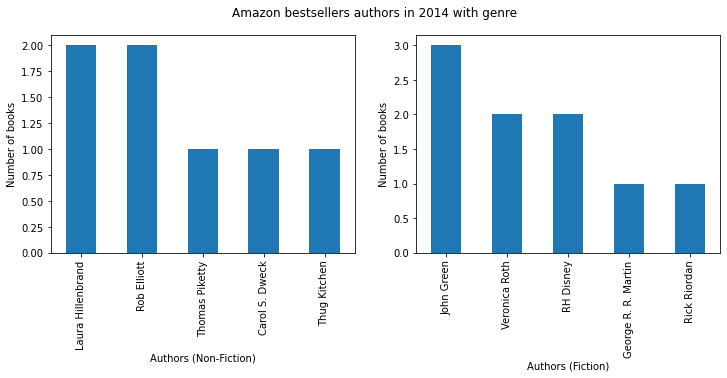

In [42]:
books_2014=books_df[books_df['Year']==2014]
fig, ax = plt.subplots(1, 2,figsize=(12, 4))
books_2014.groupby('Genre').get_group('Non Fiction')['Author'].value_counts().head().plot.bar(ax=ax[0],xlabel='Authors (Non-Fiction)',ylabel='Number of books')
books_2014.groupby('Genre').get_group('Fiction')['Author'].value_counts().head().plot.bar(ax=ax[1],xlabel='Authors (Fiction)',ylabel='Number of books')
plt.suptitle('Amazon bestsellers authors in 2014 with genre')
plt.show()

Most Frequent word in the title of books

In [31]:
from wordcloud import WordCloud

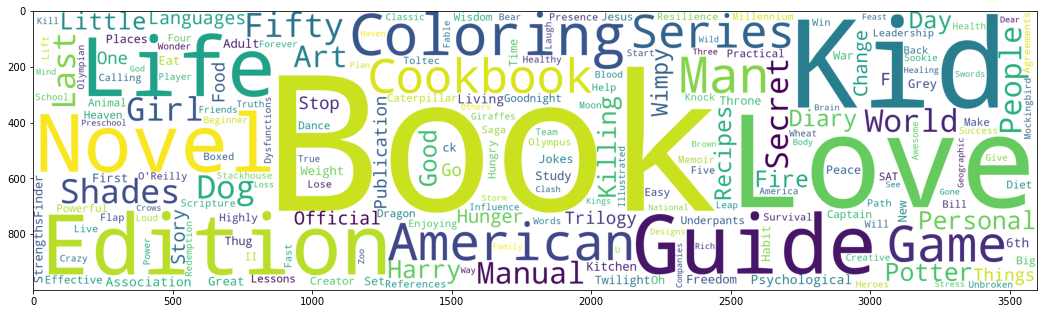

In [32]:
text = " ".join(title for title in books_df['Name'])

word_cloud = WordCloud(width=3600,
                       height=1000,
                       collocations = False, 
                       background_color = 'white',).generate(text)

plt.figure(figsize=(18,6))
plt.imshow(word_cloud)
plt.show()

Author with highest ratings

In [33]:
reviews=books_df['Reviews'].unique()

In [34]:
s=[[i,books_df.groupby(['Reviews'])['Author'].sum()[i]] for i in reviews]
s


[[17350, 'JJ Smith'],
 [2052, 'Stephen King'],
 [18979, 'Jordan B. Peterson'],
 [21424, 'George Orwell'],
 [7665, 'National Geographic Kids'],
 [12643, 'George R. R. Martin'],
 [19735, 'George R. R. Martin'],
 [19699, 'Amor Towles'],
 [5983, 'James Comey'],
 [23848, 'Fredrik BackmanFredrik Backman'],
 [460, 'Larry Schweikart'],
 [4149, 'Jaycee Dugard'],
 [5153, "Madeleine L'Engle"],
 [5013, 'Steve Harvey'],
 [2313, 'Adult Coloring Book Designs'],
 [2925, 'Blue Star Coloring'],
 [2951, 'Blue Star Coloring'],
 [2426, 'Coloring Books for Adults'],
 [9198, 'Ron Chernow'],
 [36348, 'Anthony DoerrAnthony Doerr'],
 [6310, 'Veronica Roth'],
 [15921, 'Chris Kyle'],
 [12159, 'Khaled Hosseini'],
 [798, 'Glenn Beck'],
 [9374, 'Neil deGrasse Tyson'],
 [491, 'Mark Twain'],
 [5360, 'DK'],
 [1909, 'Angie Grace'],
 [1296, 'Ina Garten'],
 [615, 'Ina Garten'],
 [61133, 'Michelle ObamaMichelle Obama'],
 [11113, 'Atul Gawande'],
 [10070, 'Ta-Nehisi CoatesTa-Nehisi Coates'],
 [3729, 'Bruce Springsteen'],
 [

Top 10 Authors with Most Books In Amazon Best Seller 2009-2019

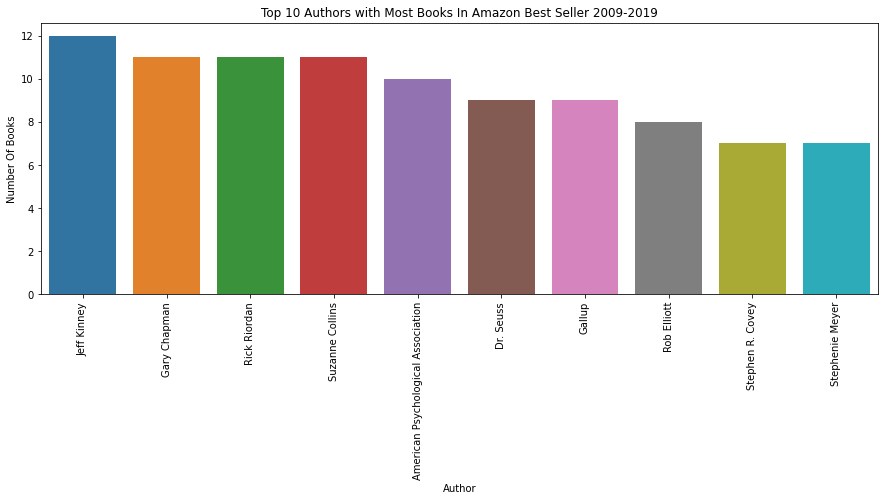

In [35]:
top_authors=books_df['Author'].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_authors.index,y=top_authors.values)
plt.xticks(rotation=+90)
plt.title('Top 10 Authors with Most Books In Amazon Best Seller 2009-2019')
plt.ylabel('Number Of Books')
plt.xlabel('Author')
plt.show()

Maximum money earned by which author

In [36]:
Author_group = books_df.groupby(['Author'])['Price'].sum()
max_earned = Author_group[Author_group==Author_group.max()]
max_earned

Author
American Psychological Association    460
Name: Price, dtype: int64

In [37]:
books_df['Year'].corr(books_df['Price'])

-0.1539785817043592

Comparing genre using Pie chart

<AxesSubplot: ylabel='Genre'>

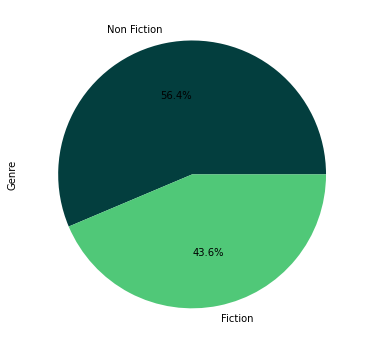

In [38]:
x = books_df['Genre'].value_counts()
x.plot.pie(autopct='%1.01f%%',colors=['#033E3E','#50C878'],figsize=(6,7))

In [39]:
books_df.groupby('Genre').agg({'User Rating':'mean','Reviews':'sum','Price':'mean'})

,User Rating,Reviews,Price
Genre,,,
Fiction,4.648333,3764110,10.850000
Non Fiction,4.595161,2810195,14.841935


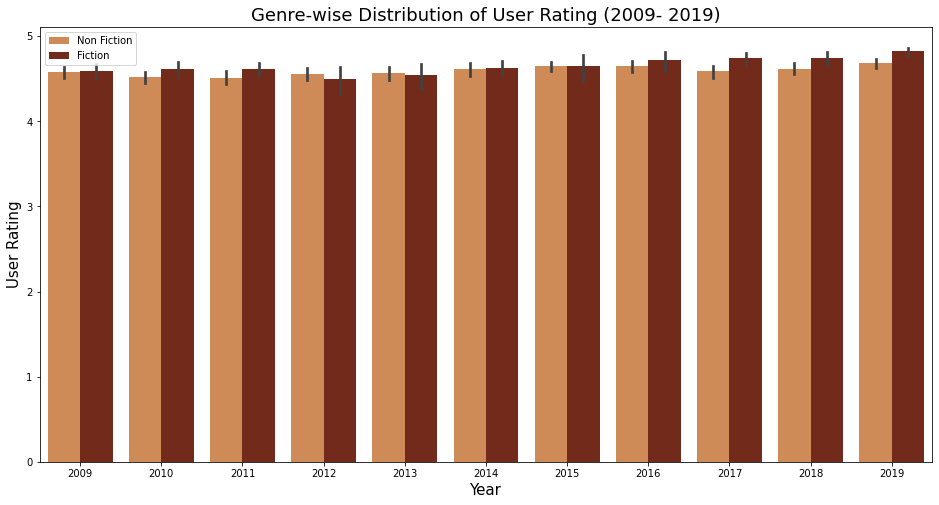

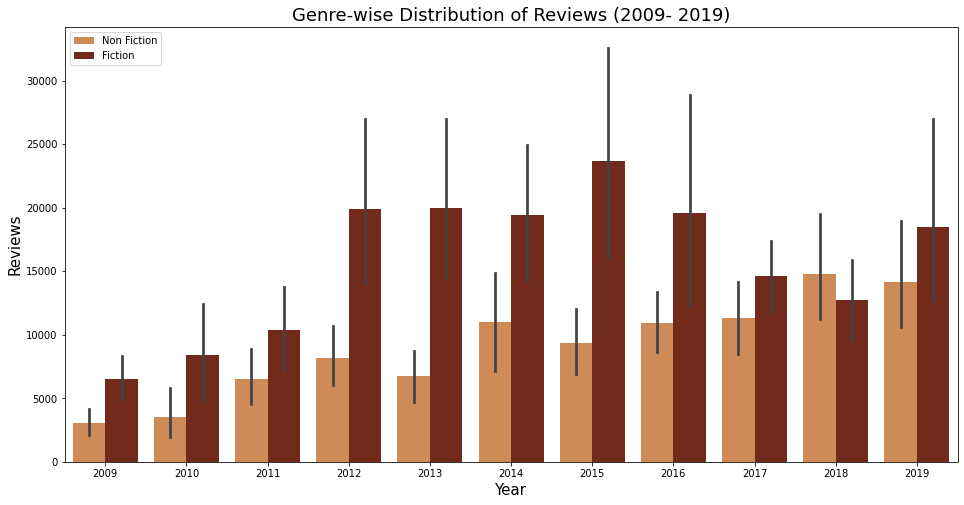

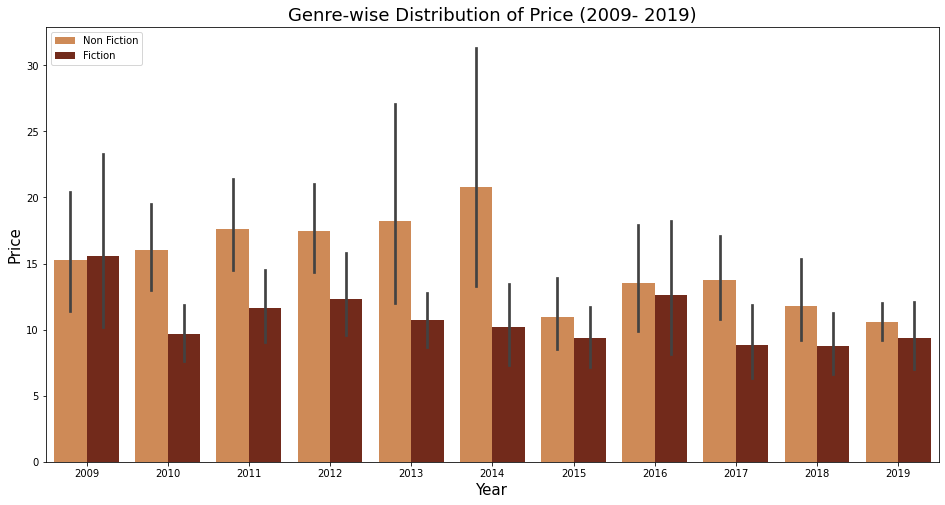

In [40]:
for col in ['User Rating','Reviews','Price']:
    plt.figure(figsize = (16,8))
    sns.barplot(data=books_df,x ="Year",y = col,hue ="Genre",palette=["#e28743","#81200c"])
    plt.legend(loc ="upper left")
    plt.title("Genre-wise Distribution of "+ col + " (2009- 2019)", fontsize = 18)
    plt.xlabel("Year", fontsize = 15)
    plt.ylabel(col,fontsize = 15)
    plt.show()

Overall Avg and Median of Ratings, Ratings per year for Fiction > Non-Fiction, but No. of bestsellers for Non-Fiction > Fiction. That means Non-Fiction is popular among more No. of people but their appreciation/liking is lesser than how the people buying Fiction appreciate it.

This Bar Chart shows a trend of over the years(2009 -2019) sales of fiction books and non fiction books. We can see from this chart that fiction generally had more sales than non-fiction from 2009 till 2017, then non-fiction started leading from 2018.

We can also see that there was a general rise in fiction sales from 2009 till it reached its peak at 2014, then an overall decline from 2014 till 2018. Then a sharp increase from 2018 to 2019.

We can also see that non-fiction sales generally had an increasing number of sales over the years with slight deviations in 2013 and 2017. We can also see that non-fiction sales reached its peak in 2018.

The peak of sales of Fiction Books was in the year 2013-2014. The peak of sales of Non - Fiction Books was in the year 2017-2018.

Mean User Rating & Total number of Reviews:
Fiction Genre has higher user rating and number of reviews than Non Fiction.
Average Price of a book:
Dropped from 15 USD levels to around 10 USD in the span of 2009-2019.

User Rating¶
Over the years, Fiction Genre is rated slightly higher Non Fiction.
Total number of Reviews:
Over the years, Fiction Genre has always had more reviews than Non Fiction.
However, reviews for Non Fiction has been steadily increasing.
Average Price of a book:
Non Fiction books are 50% more expensive at 14.84 USD than average cost of Fiction books at 10.85 USD.